In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [2]:
#This imports the rowing CSV data
rowing = Table().read_table("rowing.csv")
rowing

ID,Date,Description,Work Time (Formatted),Work Time (Seconds),Rest Time (Formatted),Rest Time (Seconds),Work Distance,Rest Distance,Stroke Rate/Cadence,Stroke Count,Pace,Avg Watts,Cal/Hour,Avg Heart Rate,Drag Factor,Age,Weight,Type,Ranked,Comments
36526970,2019-01-15 17:52:00,2000m row,7:16.6,436.6,nan,nan,2000,nan,33,244,1:49.1,269,1226,nan,128,17,Lwt,Indoor Rower,No,nan
36359492,2019-01-02 18:14:00,10000m row,42:27.2,2547.2,nan,nan,10000,nan,22,940,2:07.3,169,883,170,112,17,Lwt,Indoor Rower,No,nan
36359493,2019-01-02 17:31:00,0:44 row,0:44.4,44.4,nan,nan,180,nan,23,17,2:03.3,187,942,131,113,17,Lwt,Indoor Rower,No,nan
36359494,2019-01-02 17:29:00,0:45 row,0:45.0,45,nan,nan,180,nan,23,16,2:05.0,179,916,131,113,17,Lwt,Indoor Rower,No,nan
36156396,2018-12-27 18:45:00,1x4000m/3:00r row,16:54.8,1014.8,3:00.0,180,4000,16,22,365,2:06.8,171,890,nan,111,17,Lwt,Indoor Rower,No,nan
36156397,2018-12-27 18:23:00,1x4000m/3:00r row,17:05.4,1025.4,3:00.0,180,4000,19,21,354,2:08.1,166,872,nan,111,17,Lwt,Indoor Rower,No,nan
36143355,2018-12-26 19:02:00,12:41 row,12:41.8,761.8,nan,nan,3056,nan,21,272,2:04.6,181,922,nan,109,17,Lwt,Indoor Rower,No,nan
36143356,2018-12-26 18:47:00,2:54 row,2:54.2,174.2,nan,nan,674,nan,21,60,2:09.2,162,858,nan,109,17,Lwt,Indoor Rower,No,nan
36143357,2018-12-26 18:34:00,1:49 row,1:49.9,109.9,nan,nan,433,nan,21,38,2:06.9,171,889,nan,109,17,Lwt,Indoor Rower,No,nan
36143358,2018-12-26 18:25:00,1x4000m/2:00r row,16:52.4,1012.4,2:00.0,120,4000,19,21,356,2:06.5,173,894,nan,109,17,Lwt,Indoor Rower,No,nan


In [3]:
#This creates an array which we will later append to the table with dates without timestamps
better_date = make_array()
for i in np.arange(rowing.num_rows):
    x = rowing.column("Date").item(i)
    x = x[0:10]
    better_date = np.append(better_date, x)

In [4]:
#This selects the info we want.
better_rowing = rowing.with_column("Better Date", better_date)
better_rowing = better_rowing.select("Better Date", "Work Distance", "Drag Factor", "Work Time (Seconds)")
better_rowing.relabel("Better Date", "Date")

Date,Work Distance,Drag Factor,Work Time (Seconds)
2019-01-15,2000,128,436.6
2019-01-02,10000,112,2547.2
2019-01-02,180,113,44.4
2019-01-02,180,113,45
2018-12-27,4000,111,1014.8
2018-12-27,4000,111,1025.4
2018-12-26,3056,109,761.8
2018-12-26,674,109,174.2
2018-12-26,433,109,109.9
2018-12-26,4000,109,1012.4


In [5]:
#This groups and sums our values by date
better_rowing_grouped = better_rowing.group("Date", sum)
better_rowing_grouped

Date,Work Distance sum,Drag Factor sum,Work Time (Seconds) sum
2018-05-09,9313,99,2400
2018-05-10,18809,103,4800
2018-05-12,9435,101,2400
2018-05-13,21325,291,5414.6
2018-05-14,7127,97,1800
2018-05-18,9367,394,2252.8
2018-05-21,18904,104,4800
2018-05-22,422,168,215.1
2018-05-24,22040,nan,5742.2
2018-05-30,9636,96,2400


In [6]:
#This gives us the dates we want
better_rowing_grouped = better_rowing_grouped.where("Date", are.between_or_equal_to("2018-06-18", "2018-08-04"))
better_rowing_grouped.show()

Date,Work Distance sum,Drag Factor sum,Work Time (Seconds) sum
2018-06-18,14279,109,3600
2018-06-19,6399,775,1446.8
2018-06-20,14365,100,3600
2018-06-21,9696,136,2527.5
2018-06-22,6072,312,1474.3
2018-06-25,18403,101,4800
2018-06-26,18319,nan,4740
2018-06-27,23003,189,6000
2018-06-29,19168,758,4906.9
2018-06-30,9197,99,2400


In [7]:
#Finally we export the table as a CSV
better_rowing_grouped.to_csv("better_rowing_grouped.csv")

In [10]:
#Now in excel we added heart rate values and cleaned up our data, lets visualize!!
final_rowing = Table().read_table("rowing_data.csv")
final_rowing

Date,Work Distance,Resting Heart Rate,Work Time (Seconds)
2018-06-18,14279,49,3600
2018-06-19,6399,74,1446.8
2018-06-20,14365,72,3600
2018-06-21,9696,56,2527.5
2018-06-22,6072,58,1474.3
2018-06-25,18403,47,4800
2018-06-26,18319,45,4740
2018-06-27,23003,48,6000
2018-06-29,19168,48,4906.9
2018-06-30,9197,37,2400


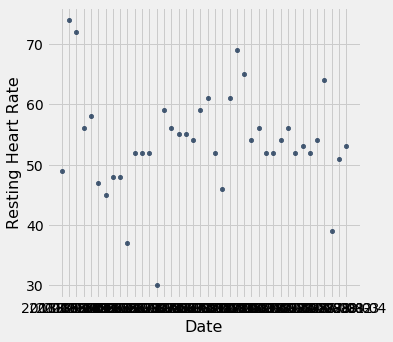

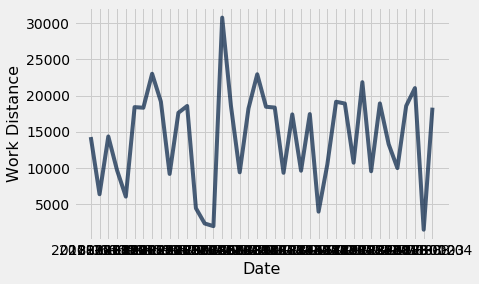

In [14]:
final_rowing.scatter("Date", "Resting Heart Rate")
final_rowing.plot("Date", "Work Distance")

In [ ]:
#This data shows a trend of resting heart rate going up, then coming back down.
#This could be indicative of fatigue and cardio improvement with volume. If we observe the line graph we can see days
#Where work distance is high also have high resting heart rates, an